# Baby Name Last Letters

## Task 1

#### Read all files from the Baby Name Dataset into a single DataFrame. The DataFrame should have the columns name, gender, number and year


In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
path=('/Users/selva/Documents/SE-25_DS/SE-25_Assignments/DS_Proj_1.3/names')

In [18]:
data = []
for year in range(1880, 2022):
    df = pd.read_csv(os.path.join(path, f'yob{year}.txt'), names=['name', 'gender', 'count'])
    df['year'] = year
    data.append(df)
    
df = pd.concat(data, axis=0, ignore_index=True)
df

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021


## Task 2

### Create an extra column with the last letter of each name.



In [141]:
df['last_letter']=df['name'].str[-1]
df

,name,gender,count,year,last_letter,first_letter
0,Mary,F,7065,1880,y,a
1,Anna,F,2604,1880,a,n
2,Emma,F,2003,1880,a,m
3,Elizabeth,F,1939,1880,h,l
4,Minnie,F,1746,1880,e,i
...,...,...,...,...,...,...
2052776,Zyeire,M,5,2021,e,y
2052777,Zyel,M,5,2021,l,y
2052778,Zyian,M,5,2021,n,y
2052779,Zylar,M,5,2021,r,y


### Alternatively, write a function that returns the last letter and use it to create a pd.Series:


In [20]:
def get_letter(my_list):
    return my_list
df['last_letter']=df.name.str[-1].apply(get_letter)
df['last_letter']
                

0          y
1          a
2          a
3          h
4          e
          ..
2052776    e
2052777    l
2052778    n
2052779    r
2052780    n
Name: last_letter, Length: 2052781, dtype: object

In [21]:
df['last_letter']=df.name.str[-1].apply(lambda x: x)
df['last_letter'].head()

0    y
1    a
2    a
3    h
4    e
Name: last_letter, dtype: object

## Task 3
### Create a bar plot showing the count of each last letter

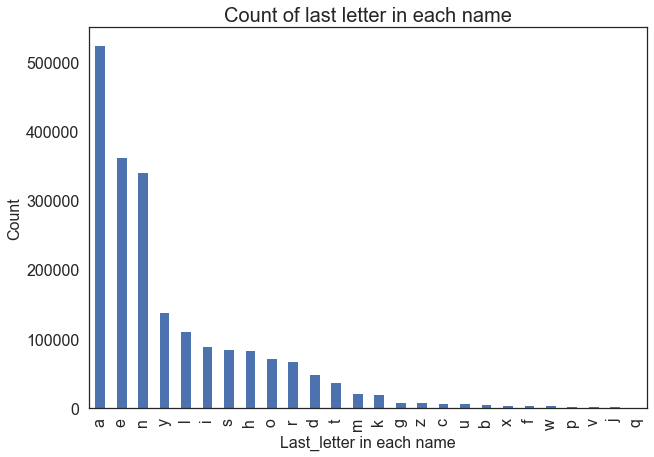

In [183]:
counts = df['last_letter'].value_counts()
counts.plot.bar(fontsize=16,figsize=(10,7))
plt.xlabel('Last_letter in each name', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Count of last letter in each name', fontsize=20)
plt.savefig('bar.png',dpi=150)

## Task 4
### Now, create a timeline for one last letter.

First, select that letter over all years. Second, group by the year and calculate the count for each year.

In [79]:
one_last_letter = df[df['last_letter'] == 'k']
one_last_letter = one_last_letter.groupby('year')['last_letter'].count()
one_last_letter
                           

year
1880     21
1881     19
1882     19
1883     18
1884     21
       ... 
2017    364
2018    365
2019    351
2020    349
2021    327
Name: last_letter, Length: 142, dtype: int64

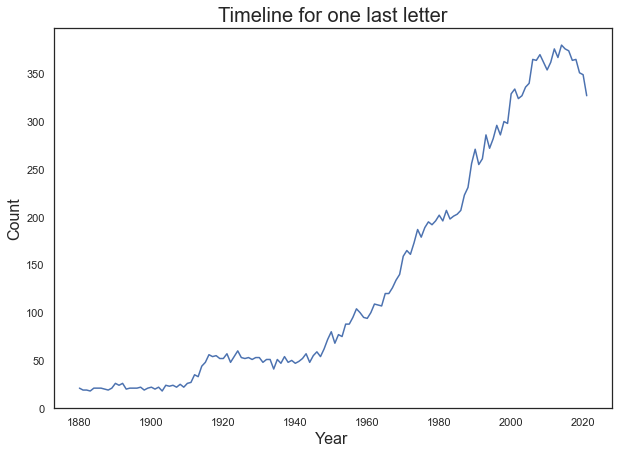

In [182]:
one_last_letter.plot(figsize=(10,7))
plt.xlabel("Year ", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Timeline for one last letter", fontsize=20)
plt.savefig('line.png',dpi=150)

## Task 5

### Let's plot multiple timelines.

Count the names grouped by last letter and year

In [40]:
names_count=df.groupby(['last_letter','year'])['name'].count()
names_count

last_letter  year
a            1880    450
             1881    432
             1882    478
             1883    480
             1884    543
                    ... 
z            2017    160
             2018    161
             2019    155
             2020    163
             2021    159
Name: name, Length: 3530, dtype: int64

In [137]:
cross=names_count.unstack()
cross.head()

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
last_letter,,,,,,,,,,,,,,,,,,,,,
a,450.0,432.0,478.0,480.0,543.0,547.0,583.0,591.0,682.0,671.0,...,7305.0,7164.0,7069.0,6999.0,6986.0,6819.0,6674.0,6532.0,6307.0,6359.0
b,7.0,6.0,7.0,5.0,10.0,8.0,7.0,8.0,7.0,7.0,...,117.0,124.0,124.0,114.0,127.0,121.0,114.0,114.0,115.0,109.0
c,7.0,8.0,8.0,8.0,7.0,8.0,7.0,8.0,8.0,8.0,...,118.0,110.0,105.0,114.0,114.0,113.0,98.0,110.0,112.0,96.0
d,93.0,85.0,96.0,96.0,101.0,88.0,103.0,105.0,110.0,108.0,...,478.0,502.0,517.0,513.0,527.0,544.0,517.0,526.0,500.0,520.0
e,490.0,484.0,538.0,542.0,584.0,614.0,633.0,633.0,711.0,721.0,...,4371.0,4344.0,4270.0,4253.0,4098.0,4091.0,4009.0,3965.0,3879.0,3907.0


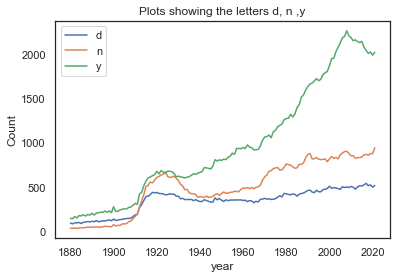

<Figure size 432x288 with 0 Axes>

In [181]:
d_plots = cross.iloc[3,:]
n_plots=cross.iloc[14,:]
y_plots=cross.iloc[24,:]
ax = d_plots.plot(label = 'd', xlabel = 'Year', ylabel = 'Count', kind = 'line')
n_plots.plot(label = 'n', ax=ax)
y_plots.plot(label = 'y', ax=ax)
plt.legend()
plt.title('Plots showing the letters d, n ,y')
plt.show()
plt.savefig('multiplelineplot.png',dpi=150)

## Task 6
### Finally, let's look for frequent first/last letter combinations.

Add an extra column containing the first letter.
Cross-tabulate by grouping by first and last letter and count the names (over all years).
Now you should have a table with first letters in columns an last letters in rows (or vice versa).

Plot a heatmap

In [148]:
df['first_letter']=df['name'].str[1]
df

,name,gender,count,year,last_letter,first_letter
0,Mary,F,7065,1880,y,a
1,Anna,F,2604,1880,a,n
2,Emma,F,2003,1880,a,m
3,Elizabeth,F,1939,1880,h,l
4,Minnie,F,1746,1880,e,i
...,...,...,...,...,...,...
2052776,Zyeire,M,5,2021,e,y
2052777,Zyel,M,5,2021,l,y
2052778,Zyian,M,5,2021,n,y
2052779,Zylar,M,5,2021,r,y


In [171]:
final=df.groupby(['first_letter','last_letter'])['name'].count()
final
heat=final.unstack()
heat

last_letter,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
first_letter,,,,,,,,,,,,,,,,,,,,,
a,144032.0,2457.0,1035.0,11700.0,99653.0,784.0,1182.0,27405.0,29121.0,642.0,...,390.0,17897.0,19793.0,9076.0,1635.0,954.0,1218.0,1160.0,34725.0,2236.0
b,1139.0,219.0,11.0,295.0,1803.0,9.0,6.0,435.0,493.0,18.0,...,8.0,750.0,137.0,242.0,141.0,38.0,5.0,NaN,538.0,86.0
c,1001.0,2.0,352.0,130.0,1888.0,2.0,NaN,156.0,217.0,NaN,...,NaN,652.0,353.0,549.0,22.0,NaN,NaN,NaN,1205.0,NaN
d,7118.0,63.0,104.0,1392.0,4614.0,86.0,22.0,1162.0,726.0,5.0,...,NaN,861.0,1590.0,259.0,18.0,22.0,25.0,3.0,832.0,125.0
e,87543.0,678.0,1233.0,9650.0,56943.0,479.0,885.0,12817.0,12917.0,256.0,...,12.0,9526.0,12504.0,5470.0,513.0,296.0,339.0,1360.0,24464.0,940.0
f,645.0,3.0,NaN,5.0,267.0,14.0,NaN,67.0,43.0,NaN,...,NaN,16.0,14.0,10.0,26.0,NaN,NaN,NaN,27.0,9.0
g,727.0,NaN,52.0,NaN,283.0,NaN,19.0,2.0,122.0,NaN,...,NaN,80.0,435.0,175.0,44.0,3.0,6.0,NaN,5.0,18.0
h,33662.0,272.0,121.0,2302.0,22937.0,401.0,788.0,3936.0,5293.0,20.0,...,75.0,4370.0,4635.0,1340.0,391.0,132.0,201.0,304.0,8021.0,469.0
i,47230.0,90.0,312.0,5917.0,25505.0,66.0,800.0,7847.0,10164.0,221.0,...,37.0,5435.0,7076.0,3349.0,578.0,228.0,290.0,72.0,14876.0,229.0


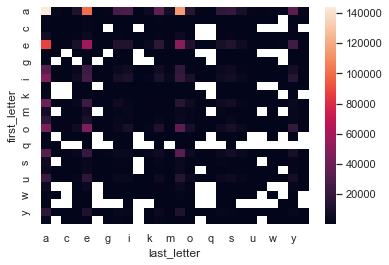

In [180]:
sns.heatmap(heat)
plt.savefig('my_fig.png',dpi=150)

### Task 7
Save your plots to .png files with 150 dpi.




In [179]:
plt.savefig('my_fig.png',dpi=150)

<Figure size 432x288 with 0 Axes>

### Task 8
### What visualization(s) would you use to compare the last letters of girls and boys?



In [ ]:
I would use relplot and displot, i have no idea about how to plot that, 
but while seeing the example outputs, for comparision visualization it would be better.